In [12]:
from fish_helpers import *
md_path = '/hybedata/Images/Zach/FISH_Signal_Amp/18Bit_PER_2019Sep20/'
tforms = pickle.load(open(os.path.join(md_path,'results','tforms.pkl'),'rb'))
print(len(tforms['good'].keys()))
print(len(tforms['bad'].keys()))

60
36


opening img_Pos1_000000066_000000000_FarRed_000_066.tif

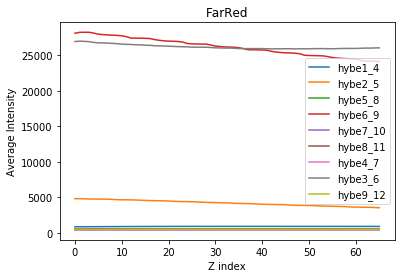

opening img_Pos1_000000066_000000000_Orange_000_066.tif

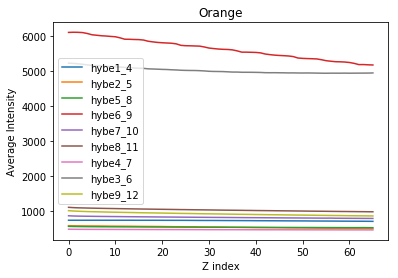

In [403]:
md_path = '/hybedata/Images/Zach/InVivo/12Hr_Debridement_2019Sep23/'
photobleach_qc(md_path,path=True)

0  Good Positions
244  Failed Positions


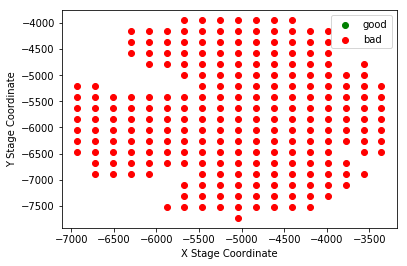

In [404]:
onfly_qc(md_path,path=True)

In [21]:
import pandas as pd
profile_df = pd.read_csv('/home/zach/Downloads/srep40508-s1.csv',index_col=0)
profile_df

,Mast Cells,Neutrophil Cells,Eosinophil Cells,B Cells Memory,B Cells Naive,Plasma Cells,T Cells CD8 Actived,T Cells CD8 Naive,T Cells CD8 Memory,M0 Macrophage,...,T Cells CD4 Follicular,Th1 Cells,Th17 Cells,Th2 Cells,Monocyte,GammaDelta T Cells,NK Resting,NK.Actived,DC Actived,DC Immature
Ngp,39.237995,18916.353213,5776.037640,65.817689,65.300643,70.874386,38.671984,53.645295,57.473955,45.929185,...,39.045338,38.751675,47.725053,60.898532,207.992629,54.439380,83.182126,46.163784,1812.850238,3399.456007
Camp,41.104777,16257.716443,320.912902,61.615683,55.471245,52.850080,40.903599,48.871369,51.327029,48.057799,...,44.950943,61.547567,56.860097,61.685258,179.597003,47.960121,88.319751,62.775023,650.577757,884.454508
Mmp8,69.275618,12196.486262,572.644999,39.406753,30.706337,43.633925,18.768778,27.028379,23.824569,569.888039,...,25.446674,29.536598,25.586833,29.879662,565.205225,26.449792,27.270153,24.250899,2041.145536,4568.498127
Cd177,16.230455,11646.907760,86.680879,12.656065,10.915883,12.478529,15.177591,11.882783,14.290257,17.297947,...,13.543828,16.455292,15.435350,14.908228,817.057582,15.768015,15.097155,13.522146,38.140916,96.700474
Mmp9,34.273311,10154.763808,435.801846,51.435896,48.785544,47.881147,30.798206,33.860734,35.069823,47.705776,...,44.354181,27.539216,51.727572,39.673080,29.961727,30.598923,44.588510,38.089099,261.149627,451.659730
Fpr2,30.568697,10047.498978,171.663827,38.447115,39.061446,46.675331,46.229575,54.265532,53.618488,381.757087,...,30.860524,25.449121,47.824884,31.818039,2170.368170,35.812117,38.256156,26.123902,5629.917841,3522.299490
Ifitm6,28.666267,9701.388757,480.509365,34.027280,26.367868,33.600717,23.400753,26.982195,28.158481,91.360752,...,21.310901,24.503077,33.983519,64.446855,7605.013392,26.019306,29.771580,29.743658,392.481657,1050.431797
Chi3l3,23.002509,9514.745683,1180.372911,9.803574,11.064887,10.194896,9.234553,10.704940,12.661735,30.069775,...,10.938448,11.569475,12.515546,67.771850,8353.676421,10.914518,17.548428,10.598027,6416.368363,7930.961804
1810033B17Rik,34.885184,6147.609631,205.212074,38.110192,50.116350,55.872308,40.173710,44.042010,41.348328,70.954993,...,27.298040,46.311740,40.791239,37.254359,4014.768741,46.594601,60.563156,47.124548,1399.720550,1955.279982
Itgb2l,69.708120,5640.211887,119.136671,58.763829,70.738974,67.389873,69.640598,65.034610,52.215391,50.392290,...,52.050204,65.610080,54.807389,51.105745,86.746794,51.850732,57.396072,49.279293,121.210030,143.441081


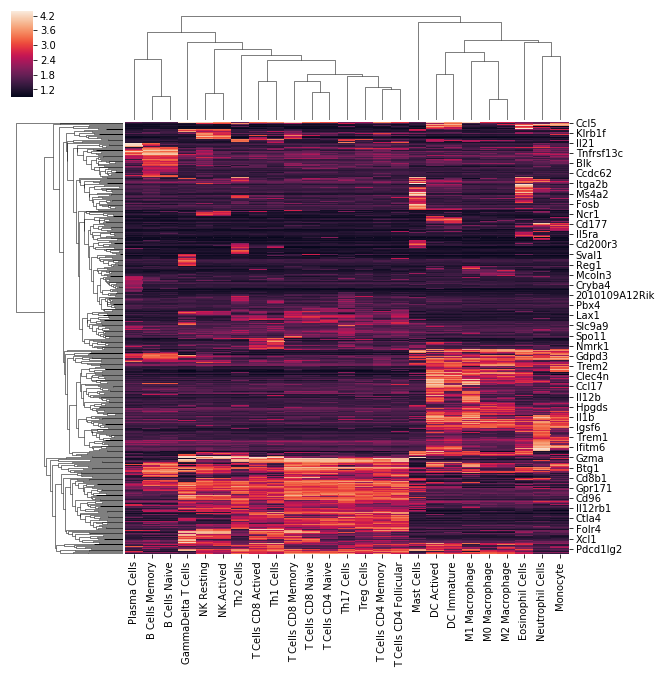

In [27]:
import seaborn as sns
sns.clustermap(np.log10(profile_df))
plt.show()

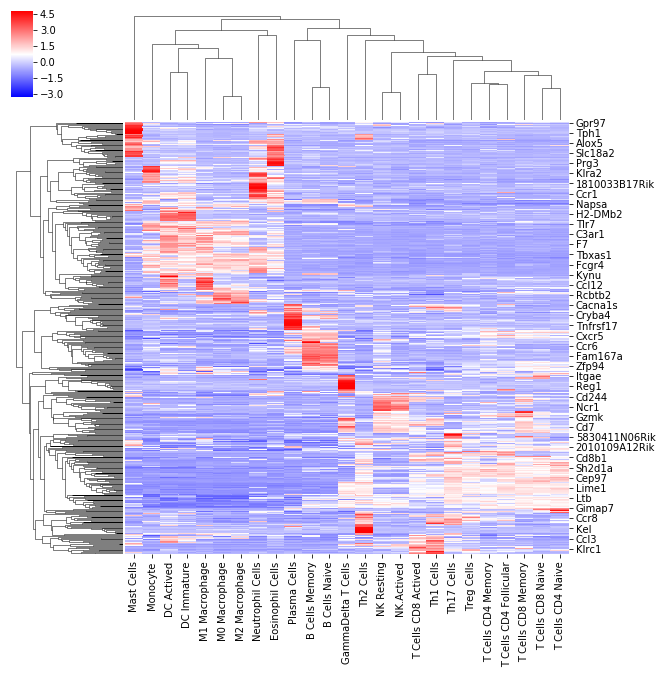

In [134]:
import seaborn as sns
sns.clustermap(np.log10(profile_df),z_score=0,cmap='bwr')
plt.show()

In [405]:
profile_df.columns

Index(['Mast Cells', 'Neutrophil Cells', 'Eosinophil Cells', 'B Cells Memory',
       'B Cells Naive', 'Plasma Cells', 'T Cells CD8 Actived',
       'T Cells CD8 Naive', 'T Cells CD8 Memory', 'M0 Macrophage',
       'M1 Macrophage', 'M2 Macrophage', 'Treg Cells', 'T Cells CD4 Memory',
       'T Cells CD4 Naive', 'T Cells CD4 Follicular', 'Th1 Cells',
       'Th17 Cells', 'Th2 Cells', 'Monocyte', 'GammaDelta T Cells',
       'NK Resting', 'NK.Actived', 'DC Actived', 'DC Immature'],
      dtype='object')

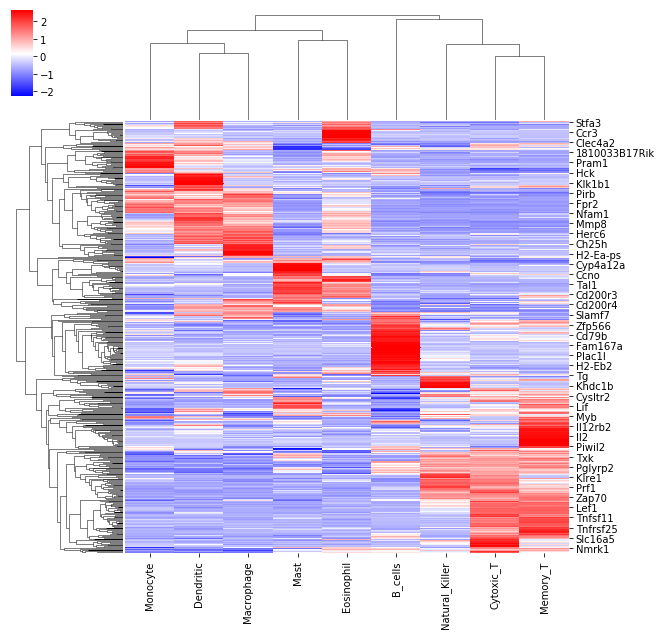

In [412]:
Mast = np.mean(profile_df[['Mast Cells']],axis=1)
Monocyte = np.mean(profile_df[['Monocyte']],axis=1)
Dendritic = np.mean(profile_df[['DC Actived','DC Immature']],axis=1)
Eosinophil = np.mean(profile_df[['Eosinophil Cells']],axis=1)
Macrophage = np.mean(profile_df[['M0 Macrophage','M1 Macrophage','M2 Macrophage']],axis=1)
Cytoxic_T = np.mean(profile_df[['T Cells CD8 Naive','T Cells CD8 Memory','T Cells CD8 Actived']],axis=1)
Memory_T = np.mean(profile_df[['T Cells CD4 Memory','T Cells CD4 Naive','T Cells CD4 Follicular','Th1 Cells','Th17 Cells','Th2 Cells','Treg Cells']],axis=1)
#T_cells = np.mean(profile_df[['T Cells CD8 Naive','T Cells CD8 Memory','T Cells CD8 Actived','T Cells CD4 Memory','T Cells CD4 Naive','T Cells CD4 Follicular','Th1 Cells','Th17 Cells','Th2 Cells','Treg Cells']],axis=1)
B_cells = np.mean(profile_df[['B Cells Naive','B Cells Memory','Plasma Cells']],axis=1)
Natural_Killer = np.mean(profile_df[['NK Resting','NK.Actived']],axis=1)
Immune_DF = pd.DataFrame(index=profile_df.index)
Immune_DF['Mast'] = Mast
Immune_DF['Monocyte'] = Monocyte
Immune_DF['Dendritic'] = Dendritic
Immune_DF['Eosinophil'] = Eosinophil
Immune_DF['Macrophage'] = Macrophage
Immune_DF['Cytoxic_T'] = Cytoxic_T
Immune_DF['Memory_T'] = Memory_T
Immune_DF['B_cells'] = B_cells
Immune_DF['Natural_Killer'] = Natural_Killer
import seaborn as sns
sns.clustermap(np.log10(Immune_DF),z_score=0,cmap='bwr')
plt.show()

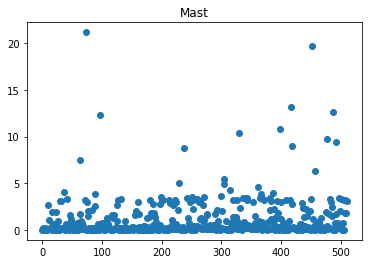

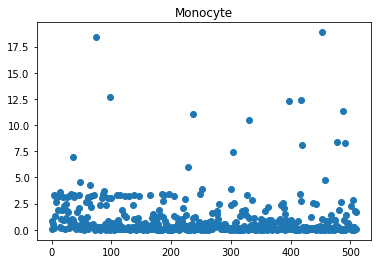

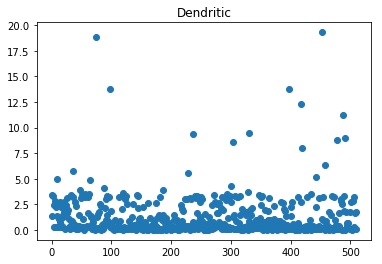

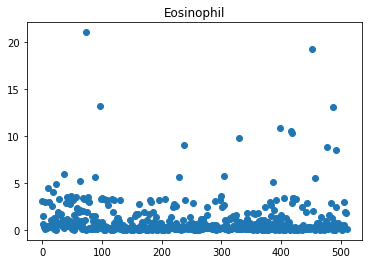

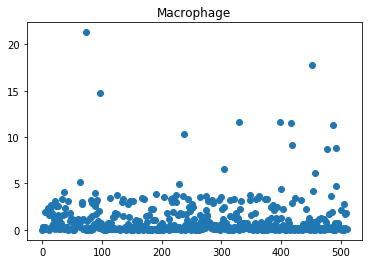

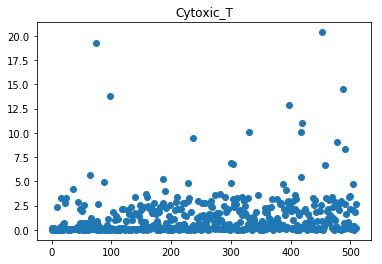

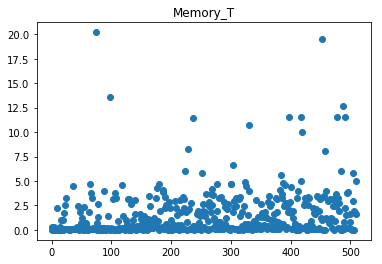

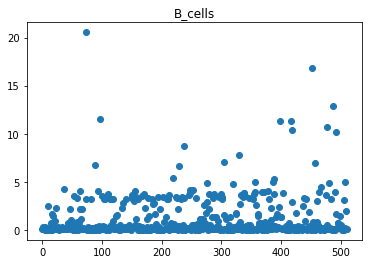

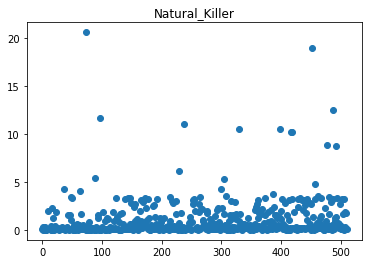

In [414]:
std = np.std(Immune_DF,axis=1)
for cell_type in Immune_DF.columns:
    Y = np.array(Immune_DF[cell_type])/std
    plt.scatter(range(0,len(Y)),Y)
    plt.title(cell_type)
    plt.show()
    

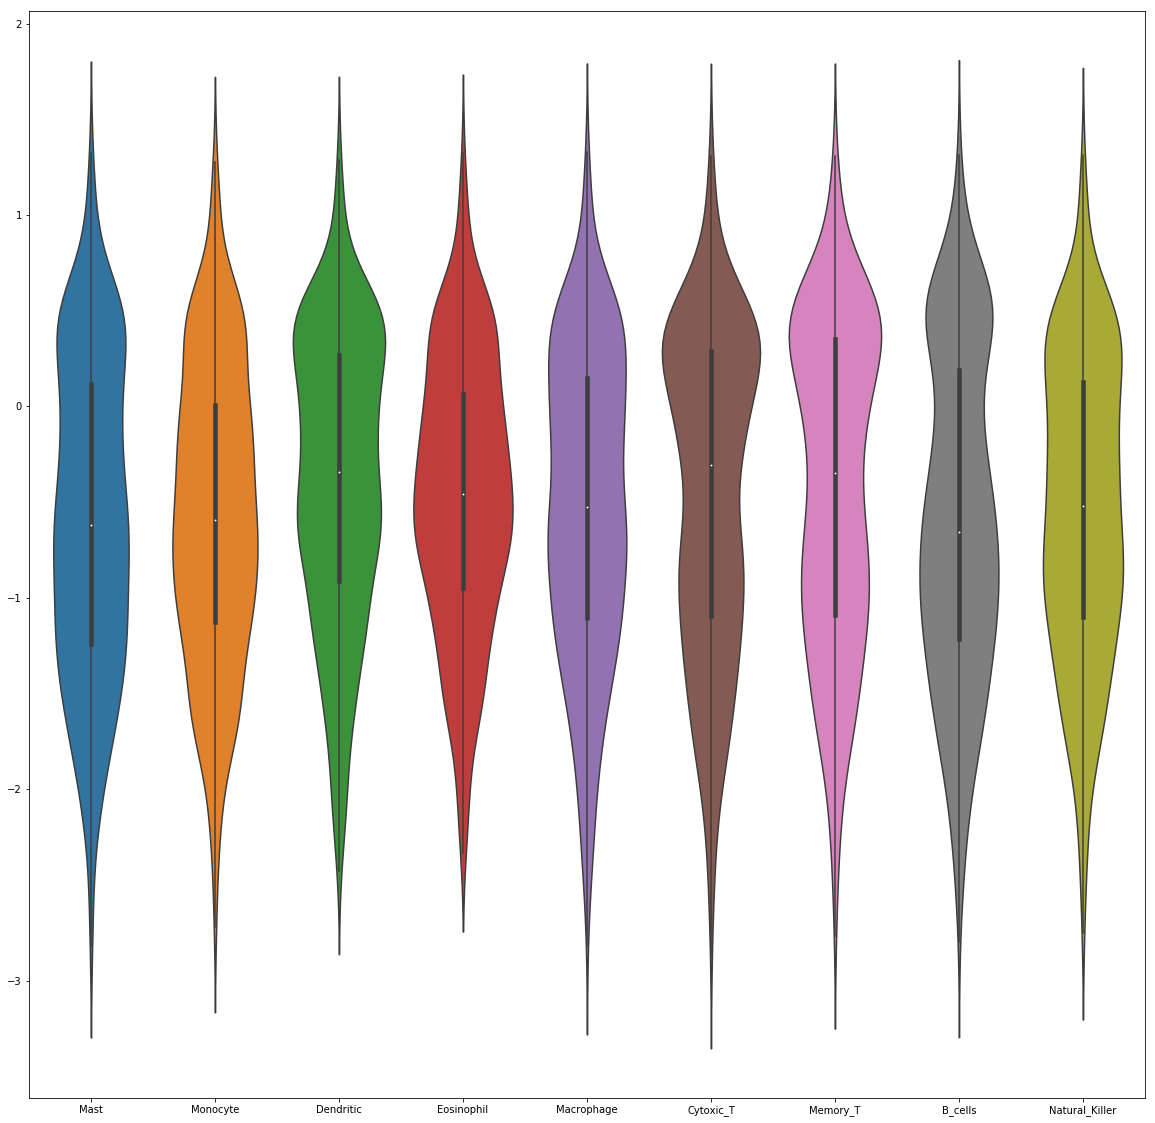

In [415]:
plt.figure(figsize=[20,20])
sns.violinplot(data=np.log10(np.divide(Immune_DF,std[:,None])))
plt.show()

In [416]:
ZScore = np.divide(Immune_DF,std[:,None])

In [417]:
cell_type_dict = {}
for cell_type in ZScore.columns:
    cell_type_dict[cell_type] = ZScore[cell_type][ZScore[cell_type]>np.percentile(ZScore[cell_type],75)].index
#     cell_type_dict[cell_type] = profile_df[cell_type][profile_df[cell_type]>np.percentile(profile_df[cell_type],95)].index
    

In [418]:
keepers = []
tossers = []
maybe = []
for cell_type,genes in cell_type_dict.items():
    for gene in genes:
        maybe.append(gene)
        if gene in keepers or gene in tossers:
            tossers.append(gene)
        else:
            keepers.append(gene)
master_keepers = []
shared = []
for gene in keepers:
    if gene in tossers:
        if not gene in shared:
            shared.append(gene)
    else:
        master_keepers.append(gene)
print(len(np.unique(maybe)))
print(len(np.unique(keepers)))
print(len(np.unique(tossers)))
print(len(np.unique(master_keepers)))
print(len(np.unique(shared)))

511
511
250
261
250


In [419]:
master_cell_type_dict = {}
shared_cell_type_dict = {}
keeper_cell_type_dict = {}
for cell_type,genes in cell_type_dict.items():
    cell_genes = []
    shared_genes = []
    keeper_genes = []
    for gene in genes:
        if gene in master_keepers:
            cell_genes.append(gene)
        if gene in shared:
            shared_genes.append(gene)
        keeper_genes.append(gene)
    master_cell_type_dict[cell_type] = cell_genes
    shared_cell_type_dict[cell_type] = shared_genes
    keeper_cell_type_dict[cell_type] = keeper_genes

In [421]:
encode_matrix = pd.DataFrame(index=master_cell_type_dict.keys(),columns=master_cell_type_dict.keys())
shared_encode_matrix = pd.DataFrame(index=master_cell_type_dict.keys(),columns=master_cell_type_dict.keys())
keeper_encode_matrix = pd.DataFrame(index=master_cell_type_dict.keys(),columns=master_cell_type_dict.keys())
for cell_type,genes in master_cell_type_dict.items():
    print('Genes for ',cell_type)
    print(genes)
    encode_matrix[cell_type] = np.sum(Immune_DF.loc[genes],axis=0)/np.sum(Immune_DF[cell_type].loc[genes],axis=0)
#     encode_matrix[cell_type] = np.sum(profile_df[cell_type].loc[genes],axis=0)/np.sum(profile_df.loc[genes],axis=0)
    print(encode_matrix[cell_type])
for cell_type,genes in shared_cell_type_dict.items():
    print('Genes for ',cell_type)
    print(genes)
    shared_encode_matrix[cell_type] = np.sum(Immune_DF.loc[genes],axis=0)/np.sum(Immune_DF[cell_type].loc[genes],axis=0)
#     shared_encode_matrix[cell_type] = np.sum(profile_df[cell_type].loc[genes],axis=0)/np.sum(profile_df.loc[genes],axis=0)
    print(shared_encode_matrix[cell_type])
for cell_type,genes in keeper_cell_type_dict.items():
    print('Genes for ',cell_type)
    print(genes)
    keeper_encode_matrix[cell_type] = np.sum(Immune_DF.loc[genes],axis=0)/np.sum(Immune_DF[cell_type].loc[genes],axis=0)
#     keeper_encode_matrix[cell_type] = np.sum(profile_df[cell_type].loc[genes],axis=0)/np.sum(profile_df.loc[genes],axis=0)
    print(keeper_encode_matrix[cell_type])

Genes for  Mast
['Gpr97', 'Rab44', 'Tal1', 'Il1rl1', 'Cst7', 'Cma1', 'Lat2', 'Tpsb2', 'Slc18a2', 'Mcpt-ps1', '1810011H11Rik', 'Gp1ba', 'Cyp4a12a', 'Tpsg1', 'Fosb', 'Fcer1a', 'Spink2', 'Poln', 'Rgs1', 'Gm14047', 'Mcpt2', 'Calca', 'Ptger3', 'Ms4a2', 'Tph1', 'Havcr2', 'Cd200r3', 'Otop1', 'Rgs13', 'Gzme', 'Gzmd']
Mast              1.000000
Monocyte          0.013173
Dendritic         0.030265
Eosinophil        0.081934
Macrophage        0.030423
Cytoxic_T         0.025969
Memory_T          0.040239
B_cells           0.006969
Natural_Killer    0.026794
Name: Mast, dtype: float64
Genes for  Monocyte
['Cd177', 'Ifitm6', '1810033B17Rik', 'Trem3', 'Pram1', 'Igsf6', 'Fgr', 'Bmx', 'Nfam1', 'AI839979', 'C130050O18Rik', 'Treml4', 'Clec4a3', 'Apoc2', 'Klra2', 'Pld4', 'Rnase6', 'Emr4', 'Gpr35', 'Ccr2', 'Gngt2', 'Cd209a', 'E230029C05Rik', 'Tifab', 'Ms4a8a', 'Bex6']
Mast              0.021059
Monocyte          1.000000
Dendritic         0.209023
Eosinophil        0.109158
Macrophage        0.114309
Cyt

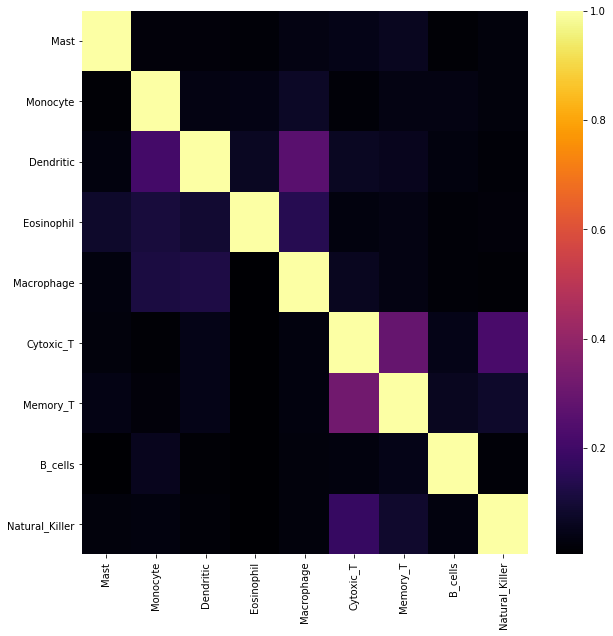

In [452]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(encode_matrix,cmap='inferno')
plt.show()

In [450]:
for bit in encode_matrix.columns:
    print(bit)
    positive_zscores = []
    negative_zscores = []
    for index in encode_matrix[bit].index:
        zscore = encode_matrix[bit].loc[index]
        if index==bit:
            positive_zscores.append(zscore)
        else:
            negative_zscores.append(zscore)
    print('Avg Positive signal: ',np.median(positive_zscores))
    print('Avg Negative signal: ',np.median(negative_zscores))
    print('S/N',np.median(positive_zscores)/np.median(negative_zscores))

Mast
Avg Positive signal:  1.0
Avg Negative signal:  0.02852935719532864
S/N 35.051613436412744
Monocyte
Avg Positive signal:  1.0
Avg Negative signal:  0.04412354679467387
S/N 22.663635918785875
Dendritic
Avg Positive signal:  1.0
Avg Negative signal:  0.042018811344040424
S/N 23.79886455645374
Eosinophil
Avg Positive signal:  1.0
Avg Negative signal:  0.006223971434389779
S/N 160.6691178681548
Macrophage
Avg Positive signal:  1.0
Avg Negative signal:  0.035355533278267195
S/N 28.284115873163568
Cytoxic_T
Avg Positive signal:  1.0
Avg Negative signal:  0.05358768841750746
S/N 18.66100273273391
Memory_T
Avg Positive signal:  1.0
Avg Negative signal:  0.05074137561561881
S/N 19.707782610690355
B_cells
Avg Positive signal:  1.0000000000000002
Avg Negative signal:  0.029732701982663527
S/N 33.63300115082302
Natural_Killer
Avg Positive signal:  1.0
Avg Negative signal:  0.025013508004597278
S/N 39.97839886417404


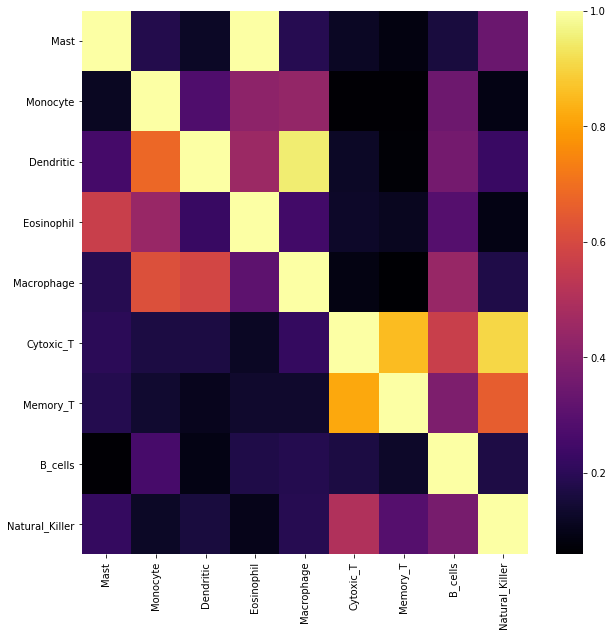

In [424]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(shared_encode_matrix,cmap='inferno')
plt.show()

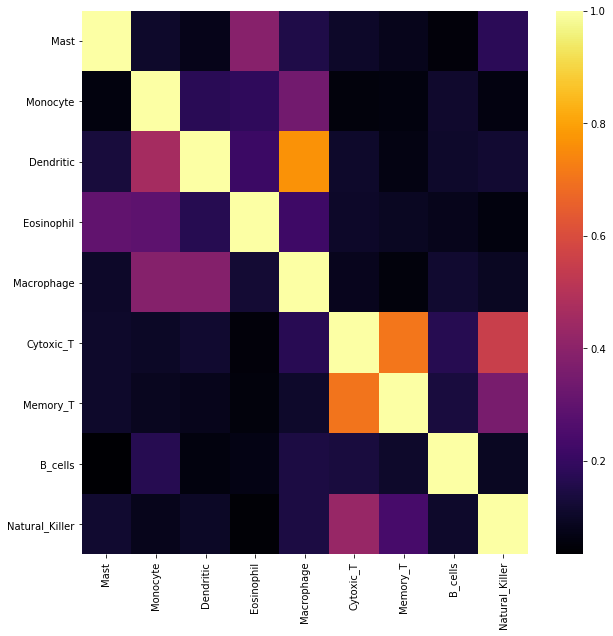

In [425]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(keeper_encode_matrix,cmap='inferno')
plt.show()

In [426]:
for bit in keeper_encode_matrix.columns:
    print(bit)
    positive_zscores = []
    negative_zscores = []
    for index in keeper_encode_matrix[bit].index:
        zscore = keeper_encode_matrix[bit].loc[index]
        if index==bit:
            positive_zscores.append(zscore)
        else:
            negative_zscores.append(zscore)
    print('Avg Positive signal: ',np.median(positive_zscores))
    print('Avg Negative signal: ',np.median(negative_zscores))
    print('S/N',np.median(positive_zscores)/np.mean(negative_zscores))

Mast
Avg Positive signal:  0.9999999999999998
Avg Negative signal:  0.10574596532191667
S/N 8.397340231487096
Monocyte
Avg Positive signal:  1.0
Avg Negative signal:  0.13770990086080262
S/N 4.764102633601548
Dendritic
Avg Positive signal:  0.9999999999999992
Avg Negative signal:  0.10648806886749537
S/N 6.9164751135432185
Eosinophil
Avg Positive signal:  1.0000000000000002
Avg Negative signal:  0.09591603354957208
S/N 7.12147184607963
Macrophage
Avg Positive signal:  0.9999999999999994
Avg Negative signal:  0.1607967382200085
S/N 3.9069737751057763
Cytoxic_T
Avg Positive signal:  0.9999999999999999
Avg Negative signal:  0.10665402404794516
S/N 4.640742269326177
Memory_T
Avg Positive signal:  1.0000000000000002
Avg Negative signal:  0.08566721173174643
S/N 5.717971302487634
B_cells
Avg Positive signal:  0.9999999999999996
Avg Negative signal:  0.10856193552432938
S/N 9.165137465763197
Natural_Killer
Avg Positive signal:  1.0000000000000002
Avg Negative signal:  0.1057343578570952
S/N 5

In [427]:
for cell_type,genes in master_cell_type_dict.items():
    print('Genes for ',cell_type)
    print(genes)

Genes for  Mast
['Gpr97', 'Rab44', 'Tal1', 'Il1rl1', 'Cst7', 'Cma1', 'Lat2', 'Tpsb2', 'Slc18a2', 'Mcpt-ps1', '1810011H11Rik', 'Gp1ba', 'Cyp4a12a', 'Tpsg1', 'Fosb', 'Fcer1a', 'Spink2', 'Poln', 'Rgs1', 'Gm14047', 'Mcpt2', 'Calca', 'Ptger3', 'Ms4a2', 'Tph1', 'Havcr2', 'Cd200r3', 'Otop1', 'Rgs13', 'Gzme', 'Gzmd']
Genes for  Monocyte
['Cd177', 'Ifitm6', '1810033B17Rik', 'Trem3', 'Pram1', 'Igsf6', 'Fgr', 'Bmx', 'Nfam1', 'AI839979', 'C130050O18Rik', 'Treml4', 'Clec4a3', 'Apoc2', 'Klra2', 'Pld4', 'Rnase6', 'Emr4', 'Gpr35', 'Ccr2', 'Gngt2', 'Cd209a', 'E230029C05Rik', 'Tifab', 'Ms4a8a', 'Bex6']
Genes for  Dendritic
['Mmp8', 'Il1b', 'Il1f9', 'Clec4e', 'Il1rn', 'Cxcl2', 'Clec4n', 'H2-DMb2', 'Ly6i', 'Dcstamp', 'Ccl17', 'Ear11', 'Ccr7', 'Ceacam15', 'F7', 'F10', 'Il1a', 'Ccl22', 'Tnfrsf9', 'Pdcd1lg2', 'Asgr2', 'Klk1b1', 'Cd70', 'Mmp13', 'Il12b', 'Tnfsf4', 'Klk1b11', 'Mucl1', 'Mmp12', 'Htra4', 'Cxcl3']
Genes for  Eosinophil
['Ngp', 'Cxcr2', 'Padi4', 'Lin28a', 'Ear2', 'Nlrp12', 'Clec4a2', 'Chst13', 'Ol

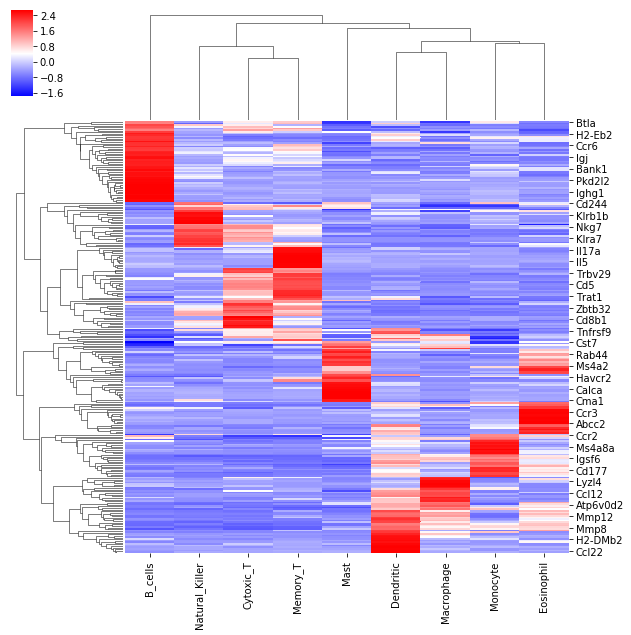

In [428]:
import seaborn as sns
sns.clustermap(np.log10(Immune_DF[Immune_DF.index.isin(master_keepers)]),z_score=0,cmap='bwr')
plt.show()

In [ ]:
import operator
from random import sample
import time
best_candidates = []
ne = operator.ne
length = 18
hamming = 4
positive_bits = 4
iterations = 100
bits = '01'
base_str = str(''.join('1' for i in range(positive_bits)))+str(''.join('0' for i in range(length-positive_bits)))
print(base_str)
very_last_time = time.time()
while time.time()-very_last_time<60:
    candidates = []
    bad_candidates = []
    last_time = time.time()
    while time.time()-last_time<0.5:
        candidate = ''.join(sample(base_str,len(base_str)))
        if candidate in candidates:
            continue
        elif candidate in bad_candidates:
            continue
        good = 0
        for can in candidates:
                if sum(map(ne, can, candidate)) < hamming:
                    good+=1
                    bad_candidates.append(candidate)
                    break
        if good==0:
            candidates.append(candidate)
            last_time = time.time()
#             print(len(candidates),' ',candidate)
    if len(candidates)>len(best_candidates):
        best_candidates = candidates
        very_last_time = time.time()
        print('Total Barcodes: ',len(best_candidates))

111100000000000000
Total Barcodes:  147
Total Barcodes:  154
Total Barcodes:  155
Total Barcodes:  157


In [293]:
import operator
from random import sample
import time
codebook_dict = {}
ne = operator.ne
length = 18
hamming = 2
positive_bits = 3
bits = '01'
for i in range(length):
    if i<=positive_bits:
        continue
    best_candidates = []
    very_last_time = time.time()
    base_str = str(''.join('1' for i in range(positive_bits)))+str(''.join('0' for i in range(i-positive_bits)))
    print(base_str)
    while time.time()-very_last_time<10:
        candidates = []
        bad_candidates = []
        last_time = time.time()
        while time.time()-last_time<0.5:
            candidate = ''.join(sample(base_str,len(base_str)))
            if candidate in candidates:
                continue
            elif candidate in bad_candidates:
                continue
            good = 0
            for can in candidates:
                    if sum(map(ne, can, candidate)) < hamming:
                        good+=1
                        bad_candidates.append(candidate)
                        break
            if good==0:
                candidates.append(candidate)
                last_time = time.time()
        if len(candidates)>len(best_candidates):
            best_candidates = candidates
            very_last_time = time.time()
            print(i,' Total Barcodes: ',len(best_candidates))
    codebook_dict[str(i)] = best_candidates

1110
4  Total Barcodes:  4
11100
5  Total Barcodes:  10
111000
6  Total Barcodes:  20
1110000
7  Total Barcodes:  35
11100000
8  Total Barcodes:  56
111000000
9  Total Barcodes:  84


KeyboardInterrupt: 

In [455]:
for i,j in enumerate(codebook_dict['6']):
    print(i,': ',j)

0 :  101001
1 :  010101
2 :  011100
3 :  101010
4 :  101100
5 :  001110
6 :  011001
7 :  011010
8 :  110001
9 :  010110
10 :  001101
11 :  110100
12 :  001011
13 :  000111
14 :  111000
15 :  110010
16 :  100110
17 :  100101
18 :  100011
19 :  010011


In [429]:
codebook = np.zeros([len(codebook_dict['6']),len(codebook_dict['6'][1])])
for y,barcode in enumerate(codebook_dict['6']):
    for x,bit in enumerate(str(barcode)):
        codebook[y,x] = bit
        

In [430]:
codebook

array([[1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1., 1.]])

In [432]:
std = np.std(Immune_DF,axis=1)
ZScore = np.divide(Immune_DF,std[:,None])

In [435]:
bit_combination_cell_type_dict = {}
for bit in range(codebook.shape[1]):
    bit_combination_cell_type_dict[str(bit)] = {}
    signal_cells = []
    noise_cells = []
    for i,cell in enumerate(Immune_DF.columns):
        if codebook[i,bit]==1:
            signal_cells.append(cell)
        else:
            noise_cells.append(cell)
    std = np.std(Immune_DF[noise_cells],axis=1)
    ZScore = np.divide(Immune_DF,std[:,None])
    for cell_type in ZScore.columns:
        bit_combination_cell_type_dict[str(bit)][cell_type] = ZScore[cell_type][ZScore[cell_type]>np.percentile(ZScore[cell_type],95)].index
#     cell_type_dict[cell_type] = profile_df[cell_type][profile_df[cell_type]>np.percentile(profile_df[cell_type],95)].index


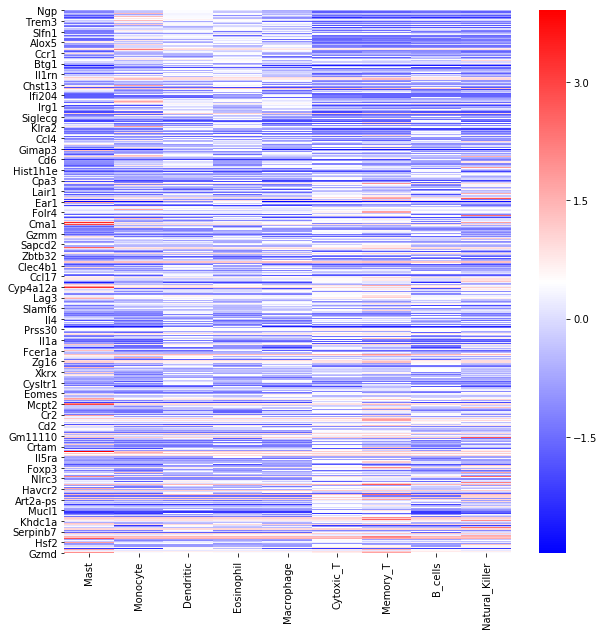

In [436]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(np.log10(ZScore),cmap='bwr')
plt.show()

In [437]:
bit_combination_cell_type_dict[str(bit)][cell_type]
np.sum(Immune_DF.loc[genes],axis=0)/np.sum(Immune_DF[cell_type].loc[genes],axis=0)

Mast              0.026797
Monocyte          0.027740
Dendritic         0.016946
Eosinophil        0.023230
Macrophage        0.014104
Cytoxic_T         0.221923
Memory_T          0.078984
B_cells           0.016636
Natural_Killer    1.000000
dtype: float64

In [438]:
codebook_matrix = pd.DataFrame(index=Immune_DF.columns,columns=bit_combination_cell_type_dict.keys())
for bit in bit_combination_cell_type_dict.keys():
    bit_genes = []
    for cells in bit_combination_cell_type_dict[bit].keys():
        for gene in bit_combination_cell_type_dict[bit][cells]:
            bit_genes.append(gene)
    codebook_matrix[bit] = np.sum(Immune_DF.loc[bit_genes],axis=0)/np.sum(Immune_DF[cell_type].loc[bit_genes],axis=0)
        
    

In [439]:
len(bit_genes)

234

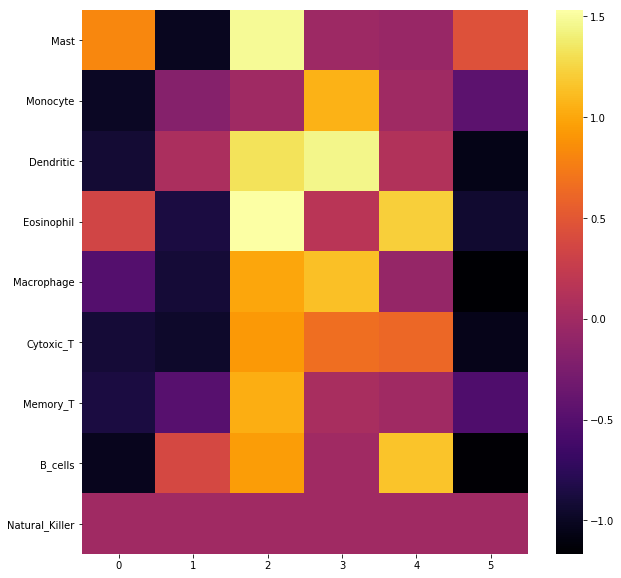

In [440]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(np.log10(codebook_matrix),cmap='inferno')
plt.show()

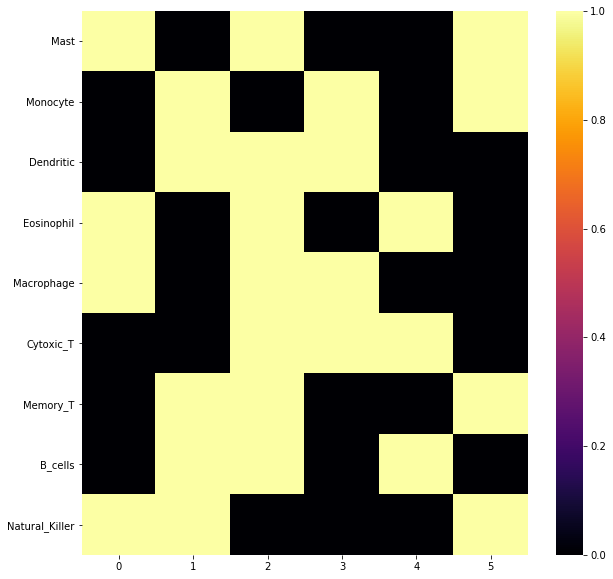

In [442]:
import seaborn as sns
codebook_df = pd.DataFrame(index=Immune_DF.columns,data=codebook[0:len(Immune_DF.columns),:])
plt.figure(figsize=[10,10])
sns.heatmap(codebook_df,cmap='inferno')
plt.show()

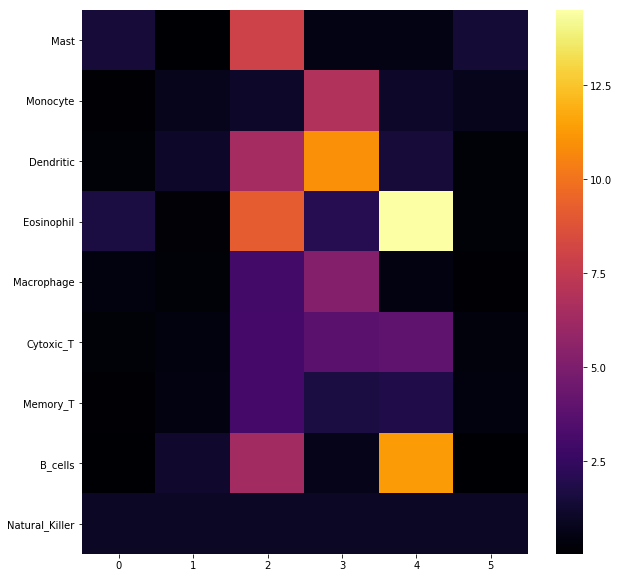

In [443]:
codebook_matrix = pd.DataFrame(index=Immune_DF.columns)
bit_genes = {}
for bit in range(codebook.shape[1]):
    bit_genes[bit] = []
    for i,cell in enumerate(Immune_DF.columns):
        if codebook[i,bit]==1:
            genes = master_cell_type_dict[cell]
            for gene in genes:
                bit_genes[bit].append(gene)
    codebook_matrix[bit] = np.sum(Immune_DF.loc[bit_genes[bit]],axis=0)/np.sum(Immune_DF[cell_type].loc[bit_genes[bit]],axis=0)
        
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(codebook_matrix,cmap='inferno')
plt.show() 

In [447]:
for bit in codebook_matrix.columns:
    print(bit)
    positive_zscores = []
    negative_zscores = []
    for index in codebook_matrix[bit].index:
        zscore = codebook_matrix[bit].loc[index]
        if codebook_df[bit].loc[index]==1:
            positive_zscores.append(zscore)
        else:
            negative_zscores.append(zscore)
    print('Avg Positive signal: ',np.median(positive_zscores))
    print('Avg Negative signal: ',np.median(negative_zscores))
    print('S/N',np.median(positive_zscores)/np.median(negative_zscores))

0
Avg Positive signal:  1.2461852078996838
Avg Negative signal:  0.1504723805923893
S/N 8.281820244975338
1
Avg Positive signal:  1.0
Avg Negative signal:  0.21878534602338534
S/N 4.570690031009265
2
Avg Positive signal:  6.324896097364177
Avg Negative signal:  1.0303505733604297
S/N 6.138586478130341
3
Avg Positive signal:  6.083382947828483
Avg Negative signal:  1.0
S/N 6.083382947828483
4
Avg Positive signal:  11.319312435700171
Avg Negative signal:  1.044565699076563
S/N 10.83638151789484
5
Avg Positive signal:  0.8630435824388955
Avg Negative signal:  0.21409042785580118
S/N 4.03121050802043


In [448]:
codebook_matrix

,0,1,2,3,4,5
Mast,1.492370,0.092476,7.955772,0.591418,0.564164,1.446755
Monocyte,0.132965,0.776351,1.060701,6.910271,1.089131,0.726087
Dendritic,0.248207,1.111201,6.461353,10.952114,1.473556,0.214090
Eosinophil,1.664445,0.209540,9.170849,2.049230,14.500424,0.219393
Macrophage,0.428660,0.228031,3.009217,5.256495,0.493723,0.142216
Cytoxic_T,0.264918,0.385360,3.048120,3.800456,3.982045,0.331731
Memory_T,0.150472,0.478252,3.074197,1.664960,1.856280,0.427144
B_cells,0.043487,1.193374,6.324896,0.682674,11.319312,0.076999
Natural_Killer,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [449]:
ZScore

,Mast,Monocyte,Dendritic,Eosinophil,Macrophage,Cytoxic_T,Memory_T,B_cells,Natural_Killer
Ngp,0.017349,0.091966,1.152334,2.553928,0.018215,0.022077,0.021086,0.029771,0.028596
Camp,0.147850,0.645992,2.760678,1.154291,0.225921,0.169177,0.201191,0.203749,0.271736
Mmp8,0.055802,0.455275,2.662044,0.461267,0.273844,0.018694,0.020348,0.030541,0.020750
Cd177,0.517983,26.075791,2.151682,2.766356,0.556452,0.439892,0.513079,0.383508,0.456682
Mmp9,0.196212,0.171529,2.040393,2.494937,0.273113,0.190314,0.271369,0.282626,0.236662
Fpr2,0.016229,1.152289,2.429541,0.091140,1.603559,0.027274,0.017076,0.021977,0.017090
Ifitm6,0.102869,27.290519,2.588941,1.724303,0.414493,0.093948,0.112062,0.112434,0.106785
Chi3l3,0.008326,3.023673,2.596559,0.427244,0.075240,0.003933,0.007424,0.003748,0.005094
1810033B17Rik,0.054683,6.293243,2.629521,0.321675,0.099936,0.065608,0.058207,0.075293,0.084401
Itgb2l,2.249857,2.799787,4.270860,3.845183,1.983442,2.010656,1.948153,2.118263,1.721495


In [114]:
import time
last_time = time.time()
time.time()-last_time

In [101]:
for candidate in candidates:
    min_ham = 0
    for can in candidates:
            ham = sum(map(ne, can, candidate))
            if ham < min_ham:
                min_ham = ham
    print(ham)

5
7
4
5
7
5
5
7
3
7
7
5
5
5
5
7
3
5
2
7
6
5
7
6
6
7
7
7
6
7
5
3
5
5
7
3
4
5
5
5
7
3
4
6
6
5
4
3
5
7
7
5
7
5
5
5
6
3
4
5
3
5
5
3
5
3
7
7
6
4
4
5
5
5
5
5
5
5
5
7
5
5
5
4
6
7
7
6
3
7
6
4
7
4
5
7
5
4
5
7
7
5
7
7
7
7
5
6
5
3
3
7
7
7
7
5
3
5
5
5
5
5
3
7
6
4
4
5
7
5
7
6
5
4
5
5
5
7
3
7
5
5
6
7
7
5
5
5
7
0


In [79]:
A = np.random.choice([0, 1], size=(18,), p=[14/18, 4/18])
print(A)
B = np.random.choice([0, 1], size=(18,), p=[14/18, 4/18])
print(B)


[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1]
[0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0]


In [95]:
np.sum(np.random.choice([0, 1], size=(length,), p=[(length-num_pos)/length, num_pos/18]))

2

In [96]:
import operator
from random import choice
ne = operator.ne
length = 18
num_pos = 4
hamming = 4
candidates = []
bad_candidates = []
while len(candidates)<150:
    candidate = np.random.choice([0, 1], size=(length,), p=[(length-num_pos)/length, num_pos/18])
    if np.sum(candidate)!=4:
        continue
    candidate = ''.join(candidate.astype(str))
    if len(candidates)==0:
        candidates.append(candidate)
        print(len(candidates),' ',candidate)
        continue
    if candidate in bad_candidates:
        continue
    if candidate in candidates:
        continue
    good = 0
    for can in candidates:
        if good!=0:
            continue
        elif sum(map(ne, can, candidate)) <= 4:
            good += 1
    if good==0:
        candidates.append(candidate)
        print(len(candidates),' ',candidate)
    else:
        bad_candidates.append(candidate)

1   000011001100000000
2   000000010011000010
3   010010000010000001
4   110000000000001010
5   010100001001000000
6   000000101010010000
7   000101000000010001
8   000000100000101001
9   000010010000010100
10   101000000100100000
11   001001100001000000
12   000000000110001100
13   001110000000001000
14   000000001000000111
15   100100100000000100
16   010001010000100000


KeyboardInterrupt: 